<a href="https://colab.research.google.com/github/Rishabh-Thapliyal/Google-colab/blob/main/SEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Table of contents**



1.   Reading the data
2.   Initial EDA
3.   Data preprocessing
      1. remove stopwords
      2. remove numbers
      3. lemmatize
      4. remove 2-3 char words
      5. remove noise words
4.   Pipeline
      1. vectorizer - word2vec, countvect, TFIDF
      2. classifier - RF, LR, SVM, KNN, etc
5.   Ensemble methods
      1. Hard voting
      2. Soft voting

6.   Misc models
      1. FastText
      2. Deep learning models
      3. Bert, etc



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.5 MB/s eta 0:00:00


In [ ]:
from faker import Faker

fake = Faker()

categories = ['Electronics', 'Clothing', 'Baby', 'Health', 'Home', 'Personal Care', 'Food', 'Pets']
electronics_subcategories = ['Peripherals', 'Audio Equipment', 'Wearables', 'Smart Home']
clothing_subcategories = ['Tops', 'Bottoms', 'Accessories']
baby_subcategories = ['Car Seats', 'Strollers', 'Nursery Furniture']
health_subcategories = ['Vitamins and Supplements', 'Sports Supplements', 'Personal Care']
home_subcategories = ['Bedding', 'Furniture', 'Kitchen Appliances']
personal_care_subcategories = ['Shaving', 'Oral Care', 'Hair Care']
food_subcategories = ['Beverages', 'Snacks', 'Canned Goods']
pets_subcategories = ['Food and Treats', 'Toys', 'Grooming']

data = {'Item Description':[], 'Category':[], 'Sub-Category':[]}

for i in range(100):
    category = fake.random_element(categories)
    if category == 'Electronics':
        subcategory = fake.random_element(electronics_subcategories)
    elif category == 'Clothing':
        subcategory = fake.random_element(clothing_subcategories)
    elif category == 'Baby':
        subcategory = fake.random_element(baby_subcategories)
    elif category == 'Health':
        subcategory = fake.random_element(health_subcategories)
    elif category == 'Home':
        subcategory = fake.random_element(home_subcategories)
    elif category == 'Personal Care':
        subcategory = fake.random_element(personal_care_subcategories)
    elif category == 'Food':
        subcategory = fake.random_element(food_subcategories)
    else:
        subcategory = fake.random_element(pets_subcategories)
    data['Item Description'].append(fake.text(max_nb_chars=50))
    data['Category'].append(category)
    data['Sub-Category'].append(subcategory)

df = pd.DataFrame(data)


In [ ]:
df.head()

,Item Description,Category,Sub-Category
0,Above how specific garden clear attention.,Home,Kitchen Appliances
1,Near six test order.,Food,Canned Goods
2,Maintain wide article he training product hard.,Home,Kitchen Appliances
3,Energy none those these military report food.,Electronics,Audio Equipment
4,Run plan amount room finish hear easy.,Food,Canned Goods


In [ ]:
df.tail()

,Item Description,Category,Sub-Category
95,Land those office travel theory nor third.,Clothing,Accessories
96,Relationship space moment Congress.,Electronics,Smart Home
97,Something movement agree house.,Personal Care,Oral Care
98,Employee central enter difference.,Personal Care,Shaving
99,Stand for investment seek woman glass.,Baby,Nursery Furniture


In [ ]:
df['Target'] = df['Category']+ '_' + df['Sub-Category']

# **Approach 1: Using CNN**

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Flatten

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

encoded_data = label_encoder.fit_transform(df['Category'])
df['encoded_Category'] = encoded_data

In [ ]:
encoded_data.max()

7

In [ ]:
X , y = df['Item Description'], df['encoded_Category']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert text data to sequences and pad them
max_words = 1000  # Number of most frequent words to keep
max_length = 50   # Maximum sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
x_train = pad_sequences(sequences_train, maxlen=max_length)
x_test = pad_sequences(sequences_test, maxlen=max_length)

In [ ]:
tokenizer.

{'give': 1,
 'level': 2,
 'ability': 3,
 'fast': 4,
 'if': 5,
 'control': 6,
 'attorney': 7,
 'let': 8,
 'itself': 9,
 'discover': 10,
 'need': 11,
 'visit': 12,
 'much': 13,
 'according': 14,
 'wear': 15,
 'chair': 16,
 'who': 17,
 'perform': 18,
 'start': 19,
 'various': 20,
 'face': 21,
 'event': 22,
 'stock': 23,
 'prove': 24,
 'sense': 25,
 'father': 26,
 'suddenly': 27,
 'charge': 28,
 'not': 29,
 'her': 30,
 'statement': 31,
 'black': 32,
 'keep': 33,
 'born': 34,
 'probably': 35,
 'project': 36,
 'worker': 37,
 'production': 38,
 'street': 39,
 'begin': 40,
 'gas': 41,
 'but': 42,
 'catch': 43,
 'draw': 44,
 'line': 45,
 'represent': 46,
 'network': 47,
 'us': 48,
 'happen': 49,
 'eat': 50,
 'per': 51,
 'rock': 52,
 'reveal': 53,
 'check': 54,
 'recent': 55,
 'director': 56,
 'debate': 57,
 'new': 58,
 'design': 59,
 'red': 60,
 'interest': 61,
 'reflect': 62,
 'reach': 63,
 'job': 64,
 'threat': 65,
 'music': 66,
 'rich': 67,
 'school': 68,
 'partner': 69,
 'watch': 70,
 'figu

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=20, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(8, activation='softmax'))  # 8 classes for 8 categories

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train

NameError: ignored

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=10)

Epoch 1/3
8/8 [==============================] - 0s 44ms/step - loss: 1.9956 - accuracy: 0.4750 - val_loss: 2.0831 - val_accuracy: 0.1500
Epoch 2/3
8/8 [==============================] - 0s 43ms/step - loss: 1.9260 - accuracy: 0.6375 - val_loss: 2.0839 - val_accuracy: 0.1500
Epoch 3/3
8/8 [==============================] - 0s 42ms/step - loss: 1.8541 - accuracy: 0.7250 - val_loss: 2.0880 - val_accuracy: 0.1500


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

1/1 [==============================] - 0s 124ms/step - loss: 2.0880 - accuracy: 0.1500
Test loss: 2.0880, Test accuracy: 0.1500


In [ ]:
predictions = []

for i in range(len(model.predict(x_test))):
  predictions.append(model.predict(x_test)[i].argmax())

1/1 [==============================] - 0s 32ms/step


In [ ]:
label_encoder.inverse_transform(predictions)

array(['Personal Care', 'Personal Care', 'Personal Care', 'Personal Care',
       'Personal Care', 'Personal Care', 'Personal Care', 'Personal Care',
       'Personal Care', 'Personal Care', 'Personal Care', 'Personal Care',
       'Personal Care', 'Personal Care', 'Personal Care', 'Personal Care',
       'Personal Care', 'Personal Care', 'Personal Care', 'Personal Care'],
      dtype=object)

In [ ]:
label_encoder.inverse_transform(y_test)

array(['Food', 'Food', 'Pets', 'Home', 'Baby', 'Home', 'Baby', 'Pets',
       'Health', 'Health', 'Clothing', 'Personal Care', 'Personal Care',
       'Food', 'Health', 'Pets', 'Personal Care', 'Food', 'Baby', 'Food'],
      dtype=object)

## **Approach 2: Using RNN with LSTM**

1. Using IMDB data

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [ ]:
# Load the IMDb dataset
num_words = 10000  # Number of most frequent words to keep
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

Row with words is changed to sequence of numbers. Every word gets a number based on its frequency in the document

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
x_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

Each of the rows in 'X' has sequence (of numbers) of different length. We will make each row of fixed length with the help of padding.

In [ ]:
# Pad sequences to have the same length
max_length = 200  # Maximum sequence length
x_train = pad_sequences(x_train, maxlen=max_length, padding='pre')
x_test = pad_sequences(x_test, maxlen=max_length, padding='pre')

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1411713 (5.39 MB)
Trainable params: 1411713 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.input_shape

(None, 200)

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

Epoch 1/3
391/391 [==============================] - 284s 721ms/step - loss: 0.3939 - accuracy: 0.8221 - val_loss: 0.3081 - val_accuracy: 0.8694
Epoch 2/3
391/391 [==============================] - 289s 739ms/step - loss: 0.2588 - accuracy: 0.8992 - val_loss: 0.3184 - val_accuracy: 0.8688
Epoch 3/3
391/391 [==============================] - 283s 724ms/step - loss: 0.1855 - accuracy: 0.9296 - val_loss: 0.3673 - val_accuracy: 0.8633


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

782/782 [==============================] - 93s 118ms/step - loss: 0.3673 - accuracy: 0.8633
Test loss: 0.3673, Test accuracy: 0.8633


2. Using BBC news articles data



*   eda
*   cleaning
*   target variable
*   words --> numbers
*   embedding layer
*   lstm



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
raw_df = pd.read_csv('bbc-text.csv')

In [ ]:
raw_df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
raw_df.shape

(2225, 2)

In [ ]:
raw_df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

NUMBER OF SAMPLES IN EACH CATEGORY: 



<Axes: xlabel='category', ylabel='count'>

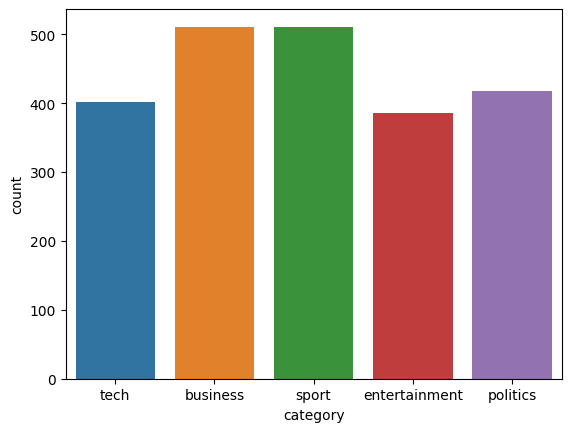

In [ ]:
# Plotting number of samples within each category
print('NUMBER OF SAMPLES IN EACH CATEGORY: \n')
sns.countplot(x = raw_df['category'])

In [ ]:
raw_df['word_count'] = raw_df['text'].apply(lambda x: len(x.split(' ')))

In [ ]:
raw_df['word_count'].describe()

count    2225.000000
mean      419.757303
std       260.055935
min        94.000000
25%       268.000000
50%       361.000000
75%       514.000000
max      4759.000000
Name: word_count, dtype: float64

## **Text Cleaning**

In [ ]:
import re
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords

In [ ]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
raw_df['clean_text']=raw_df['text'].apply(clean_text)

In [ ]:
raw_df['word_count_clean'] = raw_df['clean_text'].apply(lambda x: len(x.split(' ')))

In [ ]:
diff = raw_df['word_count'] - raw_df['word_count_clean']

In [ ]:
diff.mean(), diff.std(), diff.min(), diff.max()

(197.5838202247191, 136.43006650826524, 45, 2546)

In [ ]:
raw_df.head(30)

,category,text,word_count,clean_text,word_count_clean
0,tech,tv future in the hands of viewers with home th...,806,tv future hands viewers home theatre systems p...,410
1,business,worldcom boss left books alone former worldc...,332,worldcom boss left books alone former worldcom...,190
2,sport,tigers wary of farrell gamble leicester say ...,270,tigers wary farrell gamble leicester say rushe...,130
3,sport,yeading face newcastle in fa cup premiership s...,390,yeading face newcastle fa cup premiership side...,270
4,entertainment,ocean s twelve raids box office ocean s twelve...,287,ocean twelve raids bo office ocean twelve crim...,177
5,politics,howard hits back at mongrel jibe michael howar...,701,howard hits back mongrel jibe michael howard s...,348
6,politics,blair prepares to name poll date tony blair is...,284,blair prepares name poll date tony blair likel...,152
7,sport,henman hopes ended in dubai third seed tim hen...,202,henman hopes ended dubai third seed tim henman...,103
8,sport,wilkinson fit to face edinburgh england captai...,163,wilkinson fit face edinburgh england captain j...,94
9,entertainment,last star wars not for children the sixth an...,253,last star wars children sith final star wars m...,130


In [ ]:
raw_df['word_count_clean'].quantile([0.25, 0.5, 0.75,0.9,0.95,0.99,0.999]),

(0.250     145.000
 0.500     195.000
 0.750     272.000
 0.900     355.000
 0.950     409.800
 0.990     550.040
 0.999    1649.184
 Name: word_count_clean, dtype: float64,)

In [ ]:
list_of_sentences = []

for i in range(len(raw_df)):
  list_of_sentences.append(raw_df.iloc[i]['clean_text'])


In [ ]:
len(list_of_sentences)

2225

In [ ]:
def padding_size(s):

  return s.quantile(0.99)

In [ ]:
max_length = padding_size(raw_df['word_count_clean']).astype(int)

In [ ]:
max_length

550

## **Preprocessing - Tokenization**

In [ ]:
entire_passage = ''

for i in range(len(list_of_sentences)):

  entire_passage = entire_passage + list_of_sentences[i]

In [ ]:
len(entire_passage.split(' '))

492112

In [ ]:
entire_corpus = set(entire_passage.split(' '))

In [ ]:
number_of_words = len(entire_corpus)

In [ ]:
number_of_words

34597

In [ ]:
tokenizer = Tokenizer(num_words=number_of_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True,
                      oov_token='-1')
tokenizer.fit_on_texts(raw_df['clean_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32486 unique tokens.


In [ ]:
# word_index

In [ ]:
l = []
for key,val in word_index.items():
  l.append(key)

In [ ]:
len(set(entire_corpus - set(l)))

2229

In [ ]:
set(entire_corpus - set(l))

{'hopeneeson',
 'franceweb',
 'iisrapper',
 'charityrings',
 'onetindall',
 'eyelaura',
 'pittsburghlennon',
 'fineprince',
 'yearmutant',
 'siemensfiat',
 'coproductionpop',
 'scotlandlittle',
 'celtic#163',
 '2003fo',
 '144bndvd',
 '20152world',
 '103mlib',
 'placeschools',
 'elsefalconer',
 'bootlecollins',
 'evasionaids',
 'controlintel',
 'blogospherefarrell',
 'smokepc',
 '1996lords',
 'sessioncalifornia',
 'saleminimum',
 'underusedministers',
 '389mholmes',
 'respectfuleuronet',
 '2004quake',
 'britainuk',
 '2000high',
 'threewinndiie',
 'dollarsus',
 '2003parties',
 'heldcudicini',
 'digestalgeria',
 'profitair',
 'goalparmalat',
 'separatelymobile',
 'competitivevirus',
 'hopedstraw',
 'shoejarre',
 'februaryconsumers',
 'trophiesfinnan',
 '2005band',
 'athensink',
 'latervolcano',
 'scamsveteran',
 'wellcourt',
 'novemberdibaba',
 'cardiffkorean',
 'scientistsplaystation',
 'spokesmantoic',
 'saidnew',
 'tuesdaybank',
 'livelihoodsstandard',
 'eploitswru',
 'farmersconcessio

In [ ]:
raw_df['clean_text'][4]

'ocean twelve raids bo office ocean twelve crime caper sequel starring george clooney brad pitt julia roberts gone straight number one us bo office chart took 408m 21m weekend ticket sales according studio estimates sequel follows master criminals try pull three major heists across europe knocked last week number one national treasure third place wesley snipes blade trinity second taking 161m 84m rounding top five animated fable polar epress starring tom hanks festive comedy christmas kranks ocean twelve bo office triumph marks fourthbiggest opening december release us three films lord rings trilogy sequel narrowly beat 2001 predecessor ocean eleven took 381m 198m opening weekend 184m 958m total remake 1960s film starring frank sinatra rat pack ocean eleven directed oscarwinning director steven soderbergh soderbergh returns direct hit sequel reunites clooney pitt roberts matt damon andy garcia elliott gould catherine zetajones joins allstar cast fun good holiday movie said dan fellman 

In [ ]:
# Every word is converted to a number (based on its frequency, the most frequent word gets index 1 )

X = tokenizer.texts_to_sequences(raw_df['clean_text'].values)

In [ ]:
X = pad_sequences(X, maxlen=max_length )

In [ ]:
Y = pd.get_dummies(raw_df['category'],columns=raw_df["category"]).values

In [ ]:
Y

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [ ]:
raw_df['category'].head()

0             tech
1         business
2            sport
3            sport
4    entertainment
Name: category, dtype: object

In [ ]:
raw_df['category'].tail()

2220         business
2221         politics
2222    entertainment
2223         politics
2224            sport
Name: category, dtype: object

In [ ]:
labels = ['business','entertainment','politics','sport','tech']

In [ ]:
# Y = le.fit_transform(raw_df['category'])

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit_transform(raw_df['category'])

array([4, 0, 3, ..., 1, 2, 3])

## **Train-test split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2002, 355) (2002, 5)
(223, 355) (223, 5)


## **Modelling**

In [ ]:
model=Sequential()
model.add(Embedding(input_dim = number_of_words,100,input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

SyntaxError: ignored

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 355, 100)          3459700   
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 355, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_7 (Dense)             (None, 5)                 505       
                                                                 
Total params: 3,540,605
Trainable params: 3,540,605
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=7, batch_size=64,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
29/29 [==============================] - 37s 1s/step - loss: 1.5702 - accuracy: 0.2904 - val_loss: 1.4020 - val_accuracy: 0.4677
Epoch 2/7
29/29 [==============================] - 31s 1s/step - loss: 1.1022 - accuracy: 0.4636 - val_loss: 0.9581 - val_accuracy: 0.4826
Epoch 3/7
29/29 [==============================] - 32s 1s/step - loss: 0.8107 - accuracy: 0.6891 - val_loss: 0.6535 - val_accuracy: 0.7861
Epoch 4/7
29/29 [==============================] - 45s 2s/step - loss: 0.4397 - accuracy: 0.8878 - val_loss: 0.5494 - val_accuracy: 0.9055
Epoch 5/7
29/29 [==============================] - 45s 2s/step - loss: 0.2436 - accuracy: 0.9511 - val_loss: 0.2655 - val_accuracy: 0.9502
Epoch 6/7
29/29 [==============================] - 31s 1s/step - loss: 0.1916 - accuracy: 0.9672 - val_loss: 0.2810 - val_accuracy: 0.9403
Epoch 7/7
29/29 [==============================] - 34s 1s/step - loss: 0.0764 - accuracy: 0.9867 - val_loss: 0.1820 - val_accuracy: 0.9552


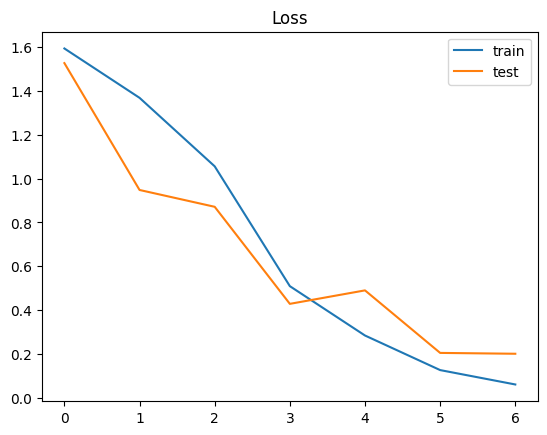

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

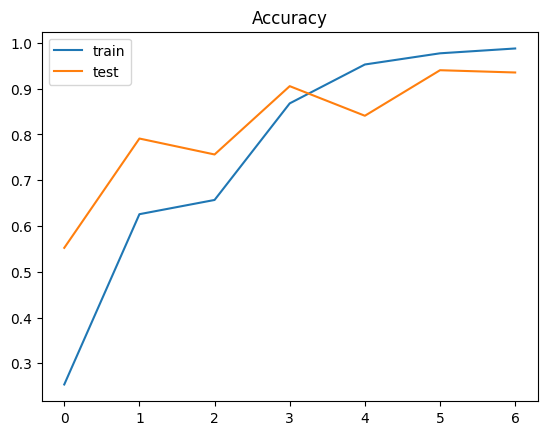

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
new_complaint = ['Cricket Australia is set to begin the team’s pre-season later this month under a set of new training protocols devised for the safety of players amid the COVID-19 pandemic.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)

labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 307ms/step
[[0.00852136 0.00510562 0.00255992 0.98045623 0.00335691]] Sports


In [ ]:
pred

array([[0.00852136, 0.00510562, 0.00255992, 0.98045623, 0.00335691]],
      dtype=float32)

## **Hyperparameter tuning**

In [ ]:
def run_experiment(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))

  model=Sequential()
  model.add(Embedding(number_of_words,100,input_length=max_length))
  model.add(SpatialDropout1D(drop_ratio))
  model.add(LSTM(100, dropout=drop_ratio, recurrent_dropout=drop_ratio))
  model.add(Dense(5, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


  history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

  score = model.evaluate(X_test, Y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [ ]:
batch_size = 64
epochs = 7
drop_ratio = 0.2
run_experiment(batch_size, epochs, drop_ratio)

batch size: 64, epochs: 7, drop_ratio: 0.2
Epoch 1/7
29/29 [==============================] - 37s 1s/step - loss: 1.5844 - accuracy: 0.2537 - val_loss: 1.5215 - val_accuracy: 0.6070
Epoch 2/7
29/29 [==============================] - 49s 2s/step - loss: 1.1956 - accuracy: 0.6197 - val_loss: 0.8333 - val_accuracy: 0.7562
Epoch 3/7
29/29 [==============================] - 46s 2s/step - loss: 0.6273 - accuracy: 0.7973 - val_loss: 0.4421 - val_accuracy: 0.8905
Epoch 4/7
29/29 [==============================] - 37s 1s/step - loss: 0.4249 - accuracy: 0.9145 - val_loss: 0.4421 - val_accuracy: 0.8706
Epoch 5/7
29/29 [==============================] - 32s 1s/step - loss: 0.2382 - accuracy: 0.9745 - val_loss: 0.2383 - val_accuracy: 0.9552
Epoch 6/7
29/29 [==============================] - 31s 1s/step - loss: 0.1212 - accuracy: 0.9845 - val_loss: 0.2929 - val_accuracy: 0.9303
Epoch 7/7
29/29 [==============================] - 32s 1s/step - loss: 0.0354 - accuracy: 0.9972 - val_loss: 0.1198 - val_a

## **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [ ]:
len(Y_test)

223

In [ ]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 2s 266ms/step - loss: 0.3998 - accuracy: 0.8924


[0.3997960686683655, 0.8923766613006592]

In [ ]:
predictions = model.predict(X_test)

7/7 [==============================] - 1s 198ms/step


In [ ]:
y_test_1d = []
y_pred_1d = []

for i in range(len(Y_test)):
  y_test_1d.append(labels[np.argmax(Y_test[i])])
  y_pred_1d.append(labels[np.argmax(predictions[i])])

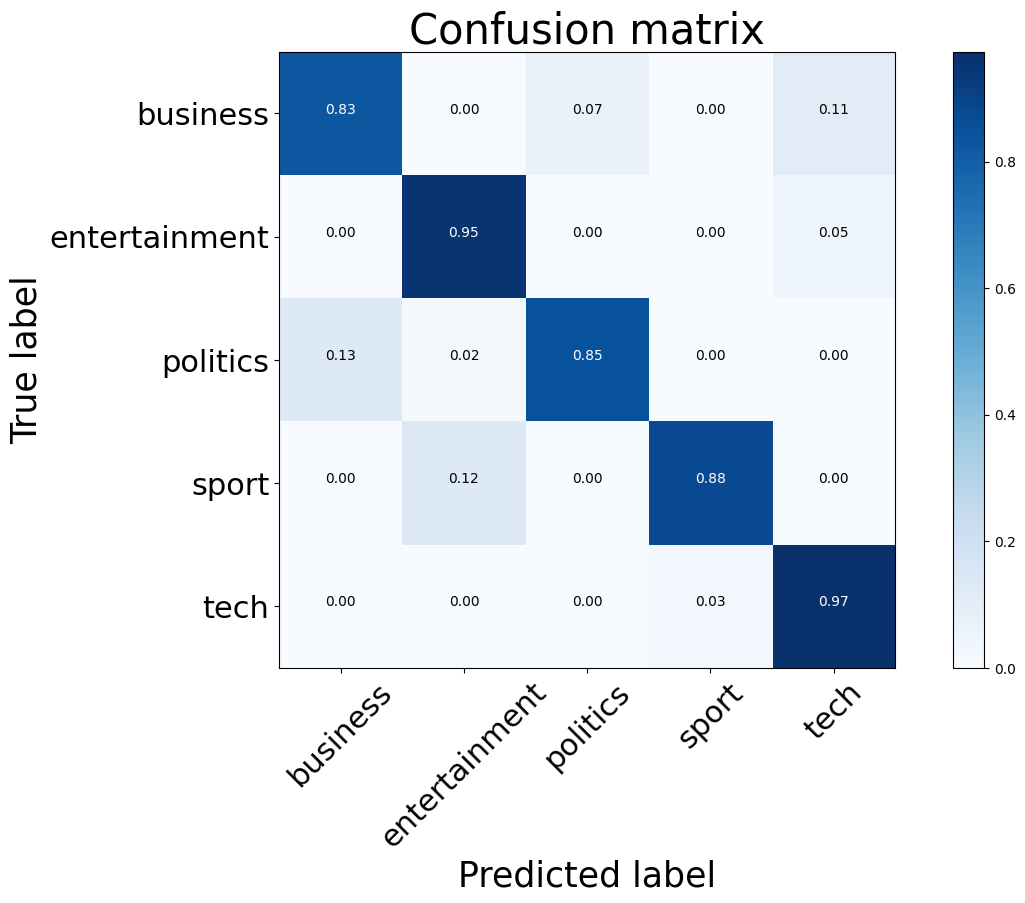

In [ ]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(15,8))
plot_confusion_matrix(cnf_matrix, classes=labels, title="Confusion matrix")
plt.show()

## **Approach 3: Using Bert**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('Approach_1.xlsx')

In [ ]:
df.head()

,S.No,TITLE,Keywords,Authors,Conference,YEAR PUBLISHED,BY THE YEAR,NUMBER OF AUTHORS,Linear Regression Prediction,Decision Tree Regressor Prediction,Random Forest Regressor Prediction,Support Vector Machine Prediction,Gradient Boosting Regressor Prediction,XG Boost Regressor Prediction,Lasso Prediction,Ridge Prediction
0,0,Grassroot innovations for institute flexibilit...,"Indian Institute(s) of Technology (IITs), tech...","N Tale, C Johari, R Thapliyal, P Adhikari, KS ...",29th International Conference of the Internati...,2020,2023,5,46.089120,25,11.12,9.165628,5.25067,6.292922,0.0,47.995235
1,1,Grassroot innovations for institute flexibilit...,"Indian Institute(s) of Technology (IITs), tech...","N Tale, C Johari, R Thapliyal, P Adhikari, KS ...",29th International Conference of the Internati...,2020,2024,5,46.544229,25,11.12,9.244576,5.25067,6.292922,0.0,48.179670
2,2,Grassroot innovations for institute flexibilit...,"Indian Institute(s) of Technology (IITs), tech...","N Tale, C Johari, R Thapliyal, P Adhikari, KS ...",29th International Conference of the Internati...,2020,2025,5,46.999338,25,11.12,9.337487,5.25067,6.292922,0.0,48.364105
3,3,Grassroot innovations for institute flexibilit...,"Indian Institute(s) of Technology (IITs), tech...","N Tale, C Johari, R Thapliyal, P Adhikari, KS ...",29th International Conference of the Internati...,2020,2026,5,47.454447,25,11.12,9.443548,5.25067,6.292922,0.0,48.548540
4,4,Grassroot innovations for institute flexibilit...,"Indian Institute(s) of Technology (IITs), tech...","N Tale, C Johari, R Thapliyal, P Adhikari, KS ...",29th International Conference of the Internati...,2020,2027,5,47.909556,25,11.12,9.561730,5.25067,6.292922,0.0,48.732975
